In [1]:
import pandas as pd
from fastai.tabular import *

In [2]:
# Temp fix
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""


Dataset filename .csv decoding

e.g. **Faults_Cleaning_Counters_100_D_20_1.csv**

Field | Description
------|-----------------
Faults_Cleaning_Counters | what is in the datset
100 |  number of machines Serial Numbers in the datset. 
D | time period of summarization D=Days W=Weeks
10 | depth of each row in periods
1 | time periods between two consecutive rows for the same Serial Number

In [61]:
# Temp fix 
#df = pd.read_csv("Faults_Cleaning_100_D_20_1.csv",parse_dates = ['Target Timestamp'])
#df = pd.read_csv("Faults_Cleaning_100_W_20_1.csv",parse_dates = ['Target Timestamp'])
df = pd.read_csv("Faults_Cleaning_Counters_100_D_20_1.csv",parse_dates = ['Target Timestamp'])



In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62300 entries, 0 to 62299
Columns: 605 entries, Unnamed: 0 to TARGET
dtypes: datetime64[ns](1), float64(601), int64(2), object(1)
memory usage: 287.6+ MB


In [63]:
last_sample = len(df)
first_test = last_sample - int(last_sample/4)
first_test,last_sample

(46725, 62300)

In [64]:
df.loc[df['TARGET']>0,'TARGET'] = 1

In [65]:
df['TARGET'].value_counts()

0.0    50332
1.0    11968
Name: TARGET, dtype: int64

In [66]:
df.columns

Index(['Unnamed: 0', 'Serial', 'Model', 'Target Timestamp', 'CLEANING-20D',
       'CLEANING-19D', 'CLEANING-18D', 'CLEANING-17D', 'CLEANING-16D',
       'CLEANING-15D',
       ...
       'tempogr4-9D', 'tempogr4-8D', 'tempogr4-7D', 'tempogr4-6D',
       'tempogr4-5D', 'tempogr4-4D', 'tempogr4-3D', 'tempogr4-2D',
       'tempogr4-1D', 'TARGET'],
      dtype='object', length=605)

In [67]:
df['Target Timestamp'].min()
df['Target day'] = (df['Target Timestamp']-df['Target Timestamp'].min()).apply(lambda d: d.days)

In [68]:
df.drop(['Unnamed: 0','Target Timestamp','Serial'],axis=1,inplace=True)

In [69]:
df['TARGET'] = df['TARGET'].astype(int)

In [70]:
df.columns

Index(['Model', 'CLEANING-20D', 'CLEANING-19D', 'CLEANING-18D', 'CLEANING-17D',
       'CLEANING-16D', 'CLEANING-15D', 'CLEANING-14D', 'CLEANING-13D',
       'CLEANING-12D',
       ...
       'tempogr4-8D', 'tempogr4-7D', 'tempogr4-6D', 'tempogr4-5D',
       'tempogr4-4D', 'tempogr4-3D', 'tempogr4-2D', 'tempogr4-1D', 'TARGET',
       'Target day'],
      dtype='object', length=603)

In [71]:
cont_names = list(df.columns)
cont_names.remove('Model')
cont_names.remove('TARGET')


In [72]:
dep_var = 'TARGET'
cat_names = ['Model']
procs = [FillMissing, Categorify, Normalize]

In [73]:
test = TabularList.from_df(df.iloc[first_test:last_sample].copy(), cat_names=cat_names,cont_names=cont_names)
data = (TabularList.from_df(df, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(first_test,last_sample)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [74]:
data.show_batch(rows=10)

Model,CLEANING-20D,CLEANING-19D,CLEANING-18D,CLEANING-17D,CLEANING-16D,CLEANING-15D,CLEANING-14D,CLEANING-13D,CLEANING-12D,CLEANING-11D,CLEANING-10D,CLEANING-9D,CLEANING-8D,CLEANING-7D,CLEANING-6D,CLEANING-5D,CLEANING-4D,CLEANING-3D,CLEANING-2D,CLEANING-1D,FAULT-20D,FAULT-19D,FAULT-18D,FAULT-17D,FAULT-16D,FAULT-15D,FAULT-14D,FAULT-13D,FAULT-12D,FAULT-11D,FAULT-10D,FAULT-9D,FAULT-8D,FAULT-7D,FAULT-6D,FAULT-5D,FAULT-4D,FAULT-3D,FAULT-2D,FAULT-1D,ngr1-20D,ngr1-19D,ngr1-18D,ngr1-17D,ngr1-16D,ngr1-15D,ngr1-14D,ngr1-13D,ngr1-12D,ngr1-11D,ngr1-10D,ngr1-9D,ngr1-8D,ngr1-7D,ngr1-6D,ngr1-5D,ngr1-4D,ngr1-3D,ngr1-2D,ngr1-1D,ngr2-20D,ngr2-19D,ngr2-18D,ngr2-17D,ngr2-16D,ngr2-15D,ngr2-14D,ngr2-13D,ngr2-12D,ngr2-11D,ngr2-10D,ngr2-9D,ngr2-8D,ngr2-7D,ngr2-6D,ngr2-5D,ngr2-4D,ngr2-3D,ngr2-2D,ngr2-1D,ngr3-20D,ngr3-19D,ngr3-18D,ngr3-17D,ngr3-16D,ngr3-15D,ngr3-14D,ngr3-13D,ngr3-12D,ngr3-11D,ngr3-10D,ngr3-9D,ngr3-8D,ngr3-7D,ngr3-6D,ngr3-5D,ngr3-4D,ngr3-3D,ngr3-2D,ngr3-1D,ngr4-20D,ngr4-19D,ngr4-18D,ngr4-17D,ngr4-16D,ngr4-15D,ngr4-14D,ngr4-13D,ngr4-12D,ngr4-11D,ngr4-10D,ngr4-9D,ngr4-8D,ngr4-7D,ngr4-6D,ngr4-5D,ngr4-4D,ngr4-3D,ngr4-2D,ngr4-1D,numacqua-20D,numacqua-19D,numacqua-18D,numacqua-17D,numacqua-16D,numacqua-15D,numacqua-14D,numacqua-13D,numacqua-12D,numacqua-11D,numacqua-10D,numacqua-9D,numacqua-8D,numacqua-7D,numacqua-6D,numacqua-5D,numacqua-4D,numacqua-3D,numacqua-2D,numacqua-1D,numcaffegenerale-20D,numcaffegenerale-19D,numcaffegenerale-18D,numcaffegenerale-17D,numcaffegenerale-16D,numcaffegenerale-15D,numcaffegenerale-14D,numcaffegenerale-13D,numcaffegenerale-12D,numcaffegenerale-11D,numcaffegenerale-10D,numcaffegenerale-9D,numcaffegenerale-8D,numcaffegenerale-7D,numcaffegenerale-6D,numcaffegenerale-5D,numcaffegenerale-4D,numcaffegenerale-3D,numcaffegenerale-2D,numcaffegenerale-1D,numcaffegr1-20D,numcaffegr1-19D,numcaffegr1-18D,numcaffegr1-17D,numcaffegr1-16D,numcaffegr1-15D,numcaffegr1-14D,numcaffegr1-13D,numcaffegr1-12D,numcaffegr1-11D,numcaffegr1-10D,numcaffegr1-9D,numcaffegr1-8D,numcaffegr1-7D,numcaffegr1-6D,numcaffegr1-5D,numcaffegr1-4D,numcaffegr1-3D,numcaffegr1-2D,numcaffegr1-1D,numcaffegr2-20D,numcaffegr2-19D,numcaffegr2-18D,numcaffegr2-17D,numcaffegr2-16D,numcaffegr2-15D,numcaffegr2-14D,numcaffegr2-13D,numcaffegr2-12D,numcaffegr2-11D,numcaffegr2-10D,numcaffegr2-9D,numcaffegr2-8D,numcaffegr2-7D,numcaffegr2-6D,numcaffegr2-5D,numcaffegr2-4D,numcaffegr2-3D,numcaffegr2-2D,numcaffegr2-1D,numcaffegr3-20D,numcaffegr3-19D,numcaffegr3-18D,numcaffegr3-17D,numcaffegr3-16D,numcaffegr3-15D,numcaffegr3-14D,numcaffegr3-13D,numcaffegr3-12D,numcaffegr3-11D,numcaffegr3-10D,numcaffegr3-9D,numcaffegr3-8D,numcaffegr3-7D,numcaffegr3-6D,numcaffegr3-5D,numcaffegr3-4D,numcaffegr3-3D,numcaffegr3-2D,numcaffegr3-1D,numcaffegr4-20D,numcaffegr4-19D,numcaffegr4-18D,numcaffegr4-17D,numcaffegr4-16D,numcaffegr4-15D,numcaffegr4-14D,numcaffegr4-13D,numcaffegr4-12D,numcaffegr4-11D,numcaffegr4-10D,numcaffegr4-9D,numcaffegr4-8D,numcaffegr4-7D,numcaffegr4-6D,numcaffegr4-5D,numcaffegr4-4D,numcaffegr4-3D,numcaffegr4-2D,numcaffegr4-1D,numcicligr1-20D,numcicligr1-19D,numcicligr1-18D,numcicligr1-17D,numcicligr1-16D,numcicligr1-15D,numcicligr1-14D,numcicligr1-13D,numcicligr1-12D,numcicligr1-11D,numcicligr1-10D,numcicligr1-9D,numcicligr1-8D,numcicligr1-7D,numcicligr1-6D,numcicligr1-5D,numcicligr1-4D,numcicligr1-3D,numcicligr1-2D,numcicligr1-1D,numcioccolato-20D,numcioccolato-19D,numcioccolato-18D,numcioccolato-17D,numcioccolato-16D,numcioccolato-15D,numcioccolato-14D,numcioccolato-13D,numcioccolato-12D,numcioccolato-11D,numcioccolato-10D,numcioccolato-9D,numcioccolato-8D,numcioccolato-7D,numcioccolato-6D,numcioccolato-5D,numcioccolato-4D,numcioccolato-3D,numcioccolato-2D,numcioccolato-1D,numlattefr-20D,numlattefr-19D,numlattefr-18D,numlattefr-17D,numlattefr-16D,numlattefr-15D,numlattefr-14D,numlattefr-13D,numlattefr-12D,numlattefr-11D,numlattefr-10D,numlattefr-9D,numlattefr-8D,numlattefr-7D,numlattefr-6D,numlattefr-5D,numlattefr-4D,numlattefr-3D,numlattefr-2D,numlattefr-1D,numlatteg

In [89]:
learn = tabular_learner(data, layers=[500,200], metrics=accuracy)

In [90]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.223775,0.748329,0.725457


In [91]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


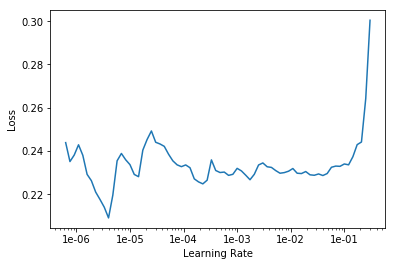

In [92]:
learn.recorder.plot()


In [93]:
learn.fit(1, 2e-3)

epoch,train_loss,valid_loss,accuracy
1,0.214330,0.798772,0.773162


In [94]:
learn.save('Faults_Cleaning_Counters_100_D_20_1_acc_0773.learner')